In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [24]:
df = pd.read_csv('heart.csv')

<AxesSubplot:>

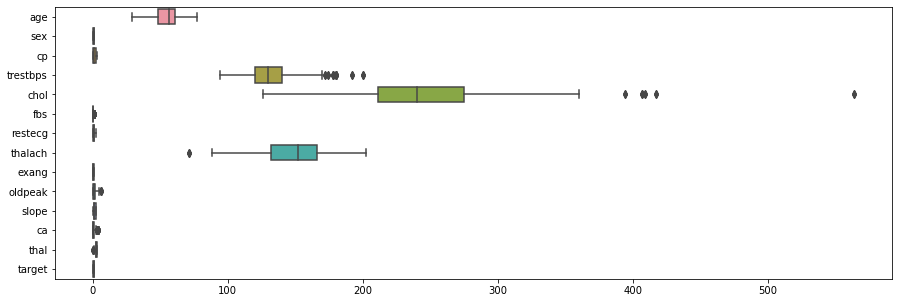

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,orient='h')

In [28]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print("Lower limit for outliers in the column chol is " + str(lower_limit))
print("Upper limit for outliers in the column chol is " + str(upper_limit))

Lower limit for outliers in the column chol is 115.0
Upper limit for outliers in the column chol is 371.0


/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

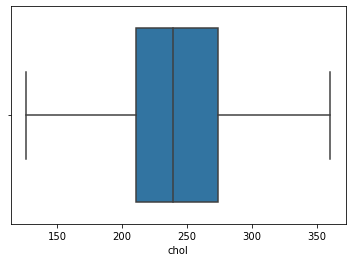

In [29]:
df=df[df["chol"] < upper_limit]
sns.boxplot(df["chol"])

In [30]:
# split data
y = df["target"]
x = df.drop("target", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [31]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [32]:
SVC_model = SVC(kernel = 'linear')
SVC_model.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
SVC_y_hat = SVC_model.predict(x_test)
SVC_y_hat

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1])

In [34]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1])

<AxesSubplot:>

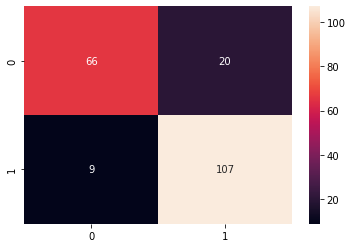

In [35]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, SVC_y_hat), annot=True, fmt='g')

In [36]:
# precision
SVC_precision = 107/(20+107)
SVC_precision

0.84251968503937

In [37]:
# recall
SVC_recall = 107/(9+107)
SVC_recall

0.9224137931034483

In [38]:
# F1 score
SVC_F1 = (2*SVC_precision*SVC_recall)/(SVC_precision+SVC_recall)
SVC_F1

0.8806584362139918

In [39]:
# accuracy
SVC_accuracy = (107+66)/(107+9+66+20)
SVC_accuracy

0.8564356435643564

In [40]:
# MSE
total_squared_error = (np.sum((y_test - SVC_y_hat)**2))
SVC_mean_squared_error = total_squared_error/len(y_test)
print(SVC_mean_squared_error)

0.14356435643564355
